In [4]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

In [6]:
input_dir = 'cleaned_csvs'
csv_paths = glob.glob(f'{input_dir}/*_scans.csv')
scan_16, scan_24, scan_32, scan_48, scan_64, scan_72 = [pd.read_csv(path) for path in csv_paths]
wave_no = pd.read_csv(f'{input_dir}/wave_no.csv')

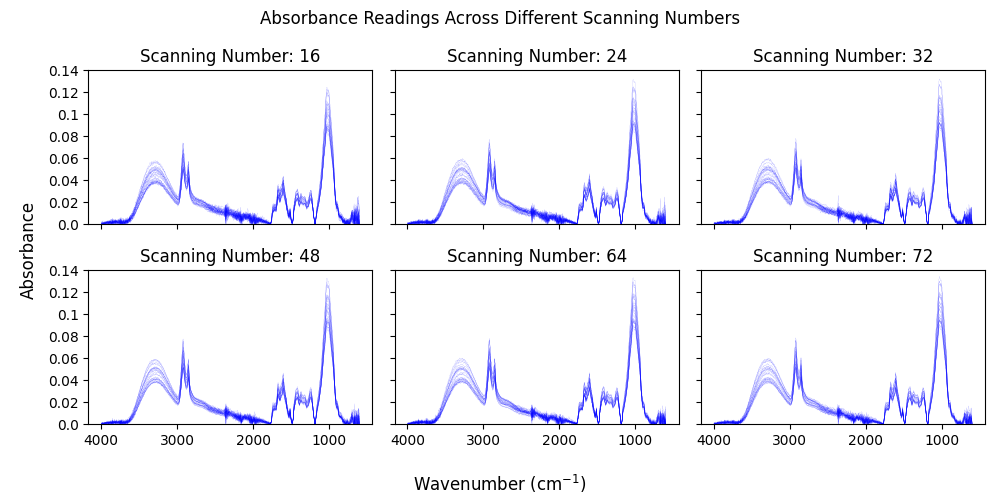

In [14]:
#Plotting All Scanning Numbers Spectra
plt.close('all')
#fig init
master_fig, axes = plt.subplots(2,3, figsize=[10,5], sharex='all',sharey='all')
axes[0,0].invert_xaxis() #inverts x axis of upper right subplot which in turn inverts that of all subplots as sharex=true

master_fig.canvas.header_visible = False
master_fig.suptitle('Absorbance Readings Across Different Scanning Numbers')
master_fig.supxlabel('Wavenumber (cm$^{-1}$)')
master_fig.supylabel('Absorbance')

#organizing data

wave_no_x = scan_16['wave_no']
pooled_df = [scan_16, scan_24, scan_32,
             scan_48, scan_64, scan_72]
sn = [16,24,32,48,64,72]

for index, (axis, df) in enumerate(zip(axes.flat, pooled_df)):
    for trial in df.columns[1:]:
        axis.plot(wave_no_x, df[trial],
                  color='blue',
                  linewidth=0.05)
    axis.set(title=f'Scanning Number: {sn[index]}',
             yticks=[tick for tick in np.arange(0, 0.160, 0.020)],
             yticklabels=[tick for tick in np.arange(0, 0.160, 0.020)],
             ylim=[0,0.140])


master_fig.tight_layout()

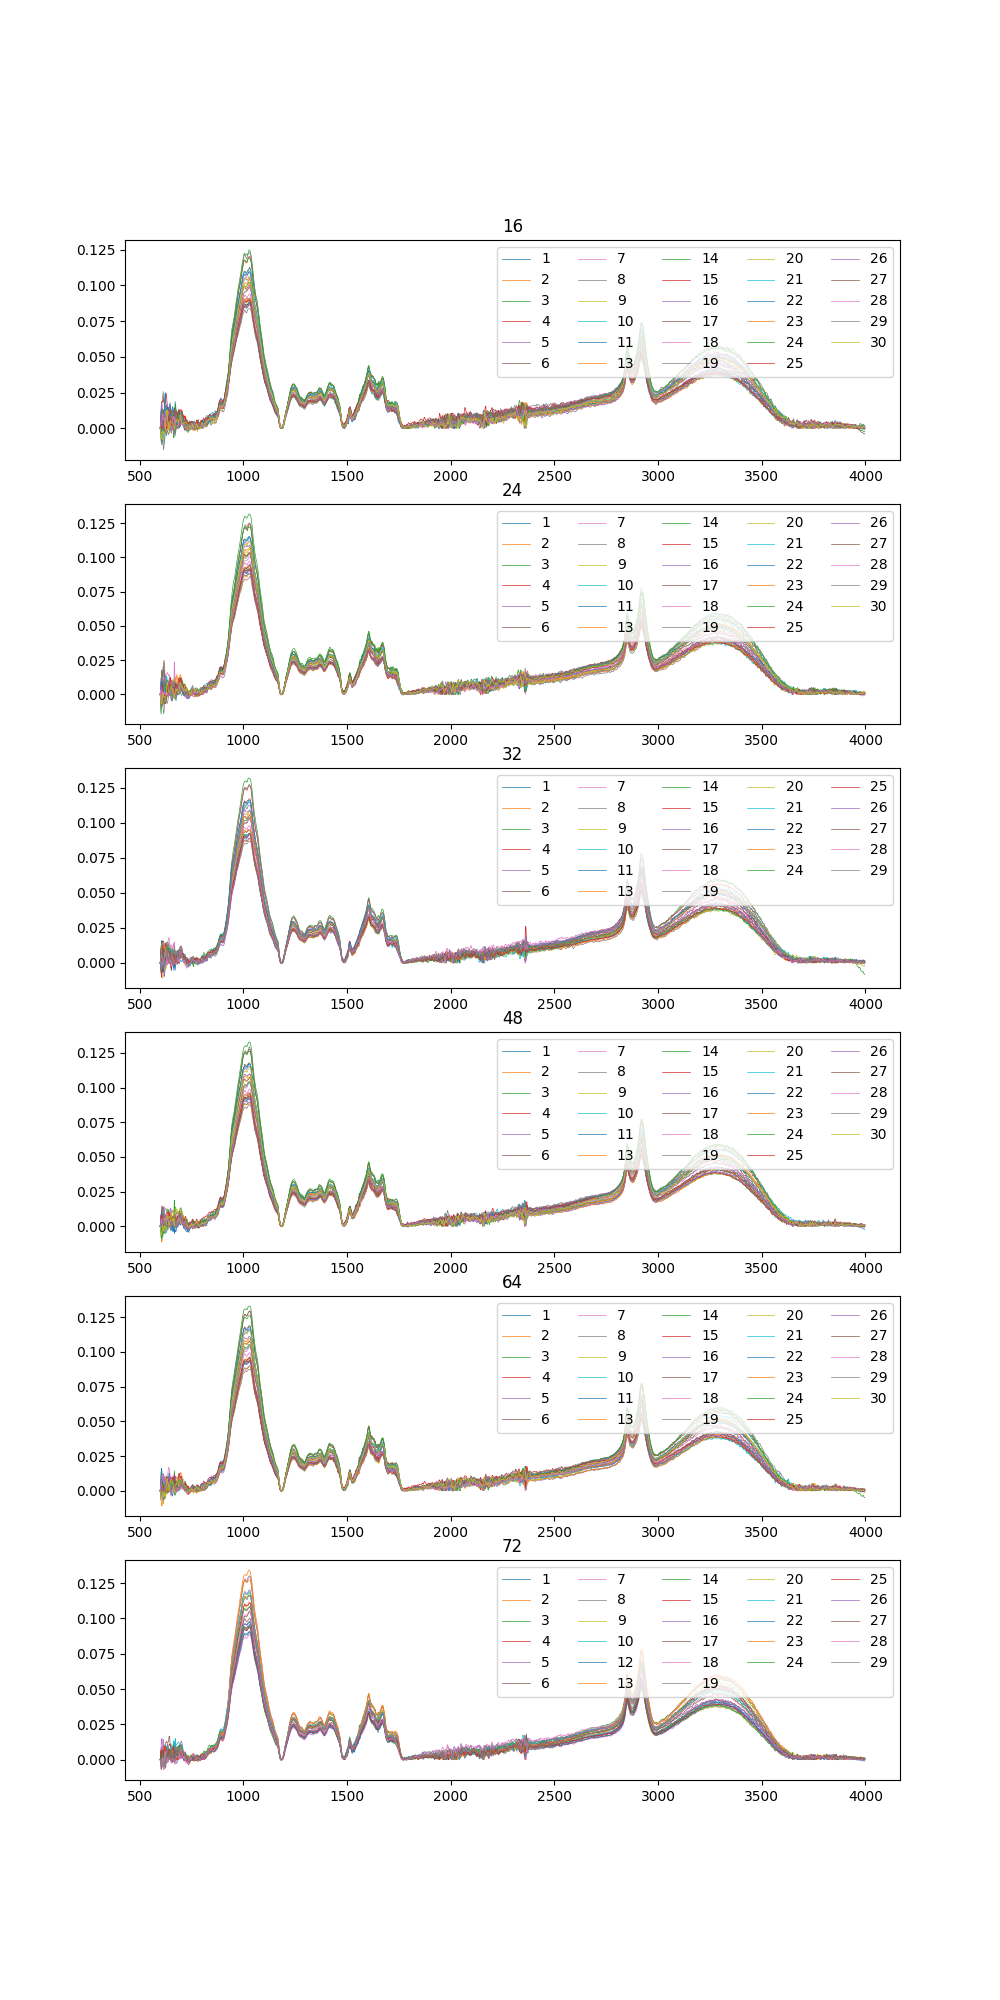

In [8]:
#checking for background scan contamination in scanning nos: 24, 32, 48
plt.close('all')
anomalous, axes = plt.subplots(6,1, figsize=[10,20])
anomalous_scan_nos = [scan_16, scan_24, scan_32, scan_48, scan_64, scan_72]
sn = [16, 24, 32, 48, 64, 72]

for index, (axis, df) in enumerate(zip(axes.flatten(), anomalous_scan_nos)):

    for sample in df.columns[1:]:
        axis.plot(wave_no, df[sample],
                  linewidth=0.5,
                  label=sample.replace('sample_',''))
        axis.set(title=f'{sn[index]}')
        axis.legend(ncols=5,
                    loc = 'upper right')